<a href="https://colab.research.google.com/github/dayaneaguiaramos/Focos-de-Inc-ndios-/blob/main/incendios_florestais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esse trabalho tem o objetivo de analisar os dados refrente a foco de incendios no Brasil. Objetivo realizar o comparativo dos 5 ultimos de anos. Do periodo de 2019 a 2023.

  Fonte dos dados: Programa Queimadas do INPE

  https://terrabrasilis.dpi.inpe.br/queimadas/situacao-atual/estatisticas/estatisticas_estados/

In [ ]:
# Instalando bibliotecas necessarias
!pip install geopandas -q
!pip install matplotlib -q
!pip install seaborn -q
!Pip install folium -q


/bin/bash: line 1: Pip: command not found


In [ ]:
# Importando bibliotecas necessarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
# Convertendo o Execel para csv
from google.colab import drive
drive.mount('/content/drive')

# Acesso a planilha Excel
read_file=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Cases/Incendios/Brasil.xlsx")

# Onde salava a converção no drive
read_file.to_csv(r"/content/drive/MyDrive/Colab Notebooks/Cases/Incendios/Brasil.csv", index= None, header = True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
brasil_incendios=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cases/Incendios/Brasil_1.csv")

In [ ]:
# Verificando a tabela
brasil_incendios.describe()

,Ano,Numero
count,1620.00000,1620.000000
mean,2021.00000,609.298148
std,1.41465,1417.491750
min,2019.00000,0.000000
25%,2020.00000,20.000000
50%,2021.00000,94.000000
75%,2022.00000,434.750000
max,2023.00000,12696.000000


In [ ]:
# Verificando informações
brasil_incendios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Ano     1620 non-null   int64 
 1   Estado  1620 non-null   object
 2   Mês     1620 non-null   object
 3   Numero  1620 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 50.8+ KB


In [ ]:
#Verfivciando a tabela de atribuito
brasil_incendios.head()

,Ano,Estado,Mês,Numero
0,2019,Acre,Janeiro,1
1,2019,Acre,Fevereiro,1
2,2019,Acre,Março,2
3,2019,Acre,Abril,6
4,2019,Acre,Maio,33


In [ ]:
# Verificando as colunas
brasil_incendios.isnull().sum()

Ano       0
Estado    0
Mês       0
Numero    0
dtype: int64

In [ ]:
# Vericando o campos unicos arquivo
brasil_incendios.nunique()

Ano         5
Estado     27
Mês        12
Numero    663
dtype: int64

Text(0, 0.5, 'Numeros')

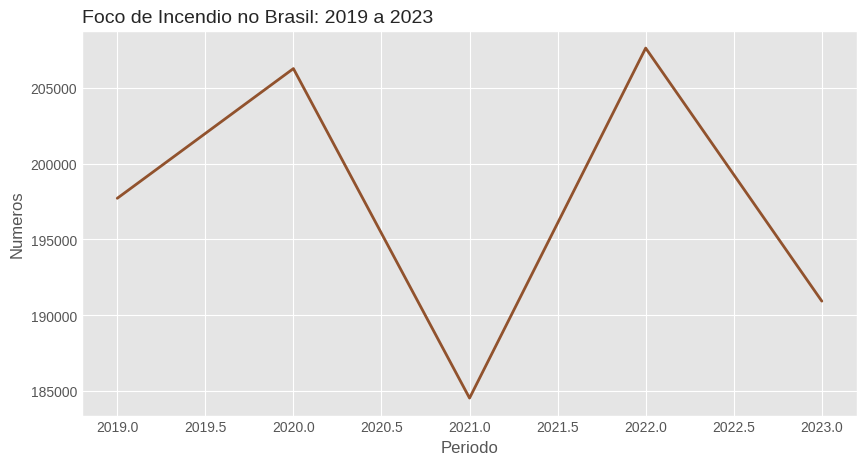

In [ ]:
# Agrupamento por Estado e criei uma variavel
projeto_01 = brasil_incendios.groupby(by=["Ano"]).sum().reset_index()

#Verificando
projeto_01.head()

# Tamanho
plt.figure( figsize=(10, 5) )

# Style
plt.style.use("ggplot")

#  Criando o grafico
plt.title("Foco de Incendio no Brasil: 2019 a 2023", loc='left', fontsize=14 )
sns.lineplot ( data=projeto_01,x="Ano", y="Numero", estimator='sum', lw=2, color="#91522d", alpha=1 );

# Labels
plt.xlabel("Periodo")
plt.ylabel("Numeros")

<ipython-input-122-4da09b5f343c>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




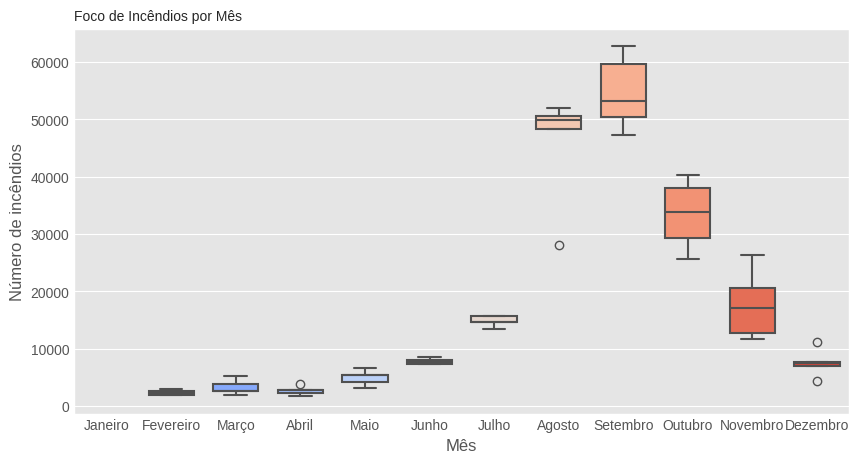

In [ ]:
# Analise por ano dos incendios
projeto_02 = brasil_incendios.groupby( by=["Ano", "Mês"] ).sum().reset_index()
projeto_02.head()

# Tamanho
plt.figure( figsize=(10, 5) )

# Criando o Grafico
plt.title("Foco de Incêndios por Mês", loc="left", fontsize=10)
sns.boxplot(data=projeto_02, x="Mês", y="Numero", palette="coolwarm", saturation=1, width=0.7, linewidth=1.5,
            order=["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"])

# Criando Rotulos
plt.xlabel("Mês")
plt.ylabel("Número de incêndios");

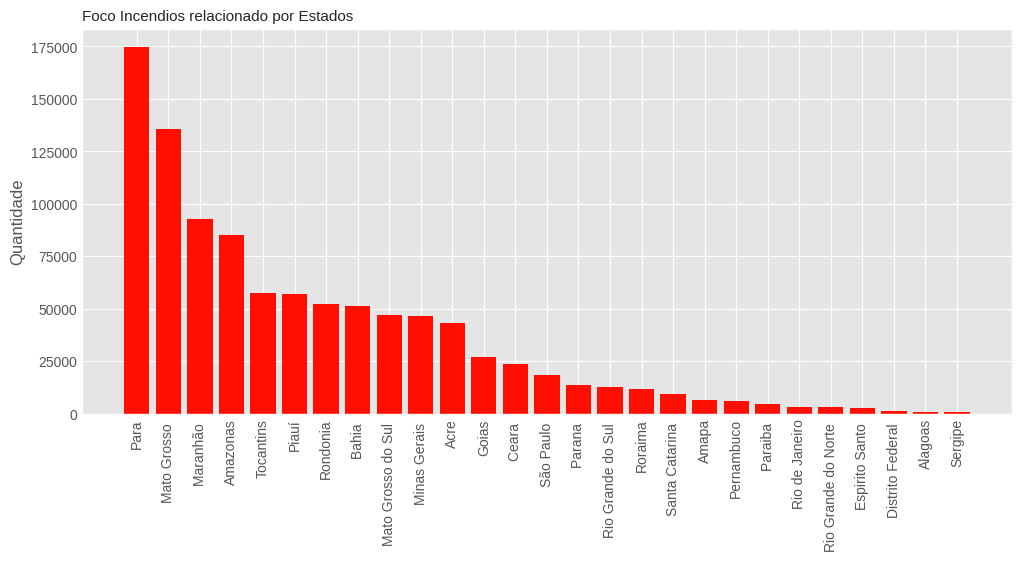

In [ ]:
# analise por ano dos incendios
projeto_03 = brasil_incendios.groupby( by=["Estado"] ).sum().reset_index()[["Estado", "Numero"]].sort_values( "Numero", ascending=False )
projeto_03.head()

# Tamanho
plt.figure( figsize=(12, 5) )

# Grafico
plt.title("Foco Incendios relacionado por Estados", loc="left", fontsize=11 )

# Grafico
plt.bar(projeto_03.Estado, projeto_03["Numero"], color="#ff0e01" )

# Labels
plt.ylabel("Quantidade")
plt.xticks( rotation=90 );

In [ ]:
# Visualizando o atributo sobre maiores focos de incendios
projeto_03.head(27)

,Estado,Numero
13,Para,174784
10,Mato Grosso,135690
9,Maranhão,92601
3,Amazonas,85094
26,Tocantins,57461
17,Piauí,56779
21,Rondonia,52219
4,Bahia,51163
11,Mato Grosso do Sul,46953
12,Minas Gerais,46426


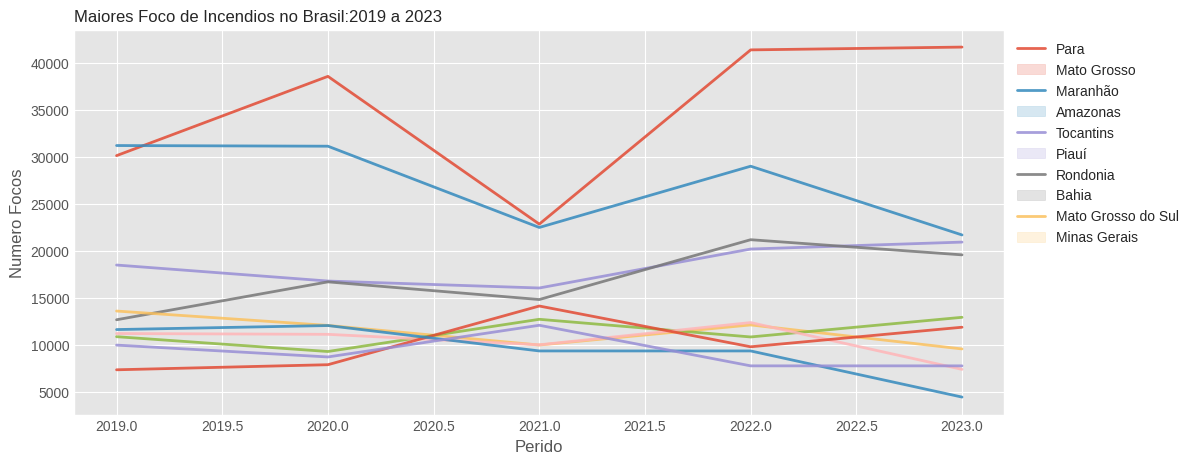

In [ ]:
# Relacionado por Estado que tem + focos de incendios
projeto_04= projeto_03["Estado"][0:10].values

# Tamanho
plt.figure( figsize=(12, 5) )

# Grafico
plt.title( "Maiores Foco de Incendios no Brasil:2019 a 2023", loc="left", fontsize=12 )

# Loop
for Coluna in projeto_04:

  # Filtrar o estado
  Filtro = brasil_incendios.loc[brasil_incendios["Estado"] == Coluna ]

  # Agrupar os valores para sumarizar
  Analise_Local = Filtro.groupby( by=["Ano"] ).sum().reset_index()

  # Plot
  sns.lineplot(data=Analise_Local, x="Ano", y="Numero", lw=2, alpha=0.85)

# Labels
plt.xlabel("Perido")
plt.ylabel("Numero Focos")

# Legenda
plt.legend( projeto_04, bbox_to_anchor=(1, 1) );

In [ ]:
# Variavel Estados
estados = projeto_03.sort_values("Estado")["Estado"].values

# Criando uma variavel com o nome de valores juntar as colunas Estado e Numero
valores = projeto_03.sort_values("Estado")["Numero"].values

# Latitudes
Lat = [-8.51584,-9.65085, -1.88931,-3.12269,-13.11158,-3.78067,-15.78829,-20.32789,-16.68619,-2.52878,-15.6151,-20.48234,-19.92042,-6.06955,-7.22761,
       -25.37009,-8.05787,-5.10052,-22.93105,-5.81318,-30.03343,-9.53575,-2.35041,-27.59563,-23.56902,-10.92097,-10.92097]

# Longitudes
Log = [ -63.96227,-35.73577,-52.27295,-59.99908,-39.00146,-38.52081,-47.88528,-40.33356,-49.27094,-44.26666,-56.08521,-54.62677,-43.96591,-49.8999,-35.89783,
       -49.3396,-34.89395,-42.79449,-43.20082,-35.21152,-51.15784,-65.50049,-60.11719,-48.53708,-46.6507,-37.08572,-37.08572]
# Organizados os dados
Dicionario = {
    "Estados" : estados,
    "Latitude" : Lat,
    "Longitude" : Log,
    "Incêndios" : valores
}

# Lendo o dicionario
df = pd.DataFrame (Dicionario)

df.head(27)

,Estados,Latitude,Longitude,Incêndios
0,Acre,-8.51584,-63.96227,43235
1,Alagoas,-9.65085,-35.73577,931
2,Amapa,-1.88931,-52.27295,6235
3,Amazonas,-3.12269,-59.99908,85094
4,Bahia,-13.11158,-39.00146,51163
5,Ceara,-3.78067,-38.52081,23609
6,Distrito Federal,-15.78829,-47.88528,1008
7,Espirito Santo,-20.32789,-40.33356,2592
8,Goias,-16.68619,-49.27094,27147
9,Maranhão,-2.52878,-44.26666,92601


In [ ]:
# Importando a bibliotecas necessarias
import pandas as pd
import folium
from folium.plugins import HeatMap
import geopandas as gpd

In [ ]:
# Definindo a localização central
center_location = [-10.92097,-37.08572]

# Criando o mapa base
m = folium.Map(location=center_location, zoom_start=4)


In [ ]:
df= [[row["Latitude"], row["Longitude"]] for index, row in df.iterrows()]

# Adicionando o HeatMap ao mapa base
HeatMap(df).add_to(m)

In [ ]:
# Visualizando o mapa
m

<ipython-input-219-aeb04fe2c521>:8: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.

<ipython-input-219-aeb04fe2c521>:21: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.

<ipython-input-219-aeb04fe2c521>:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




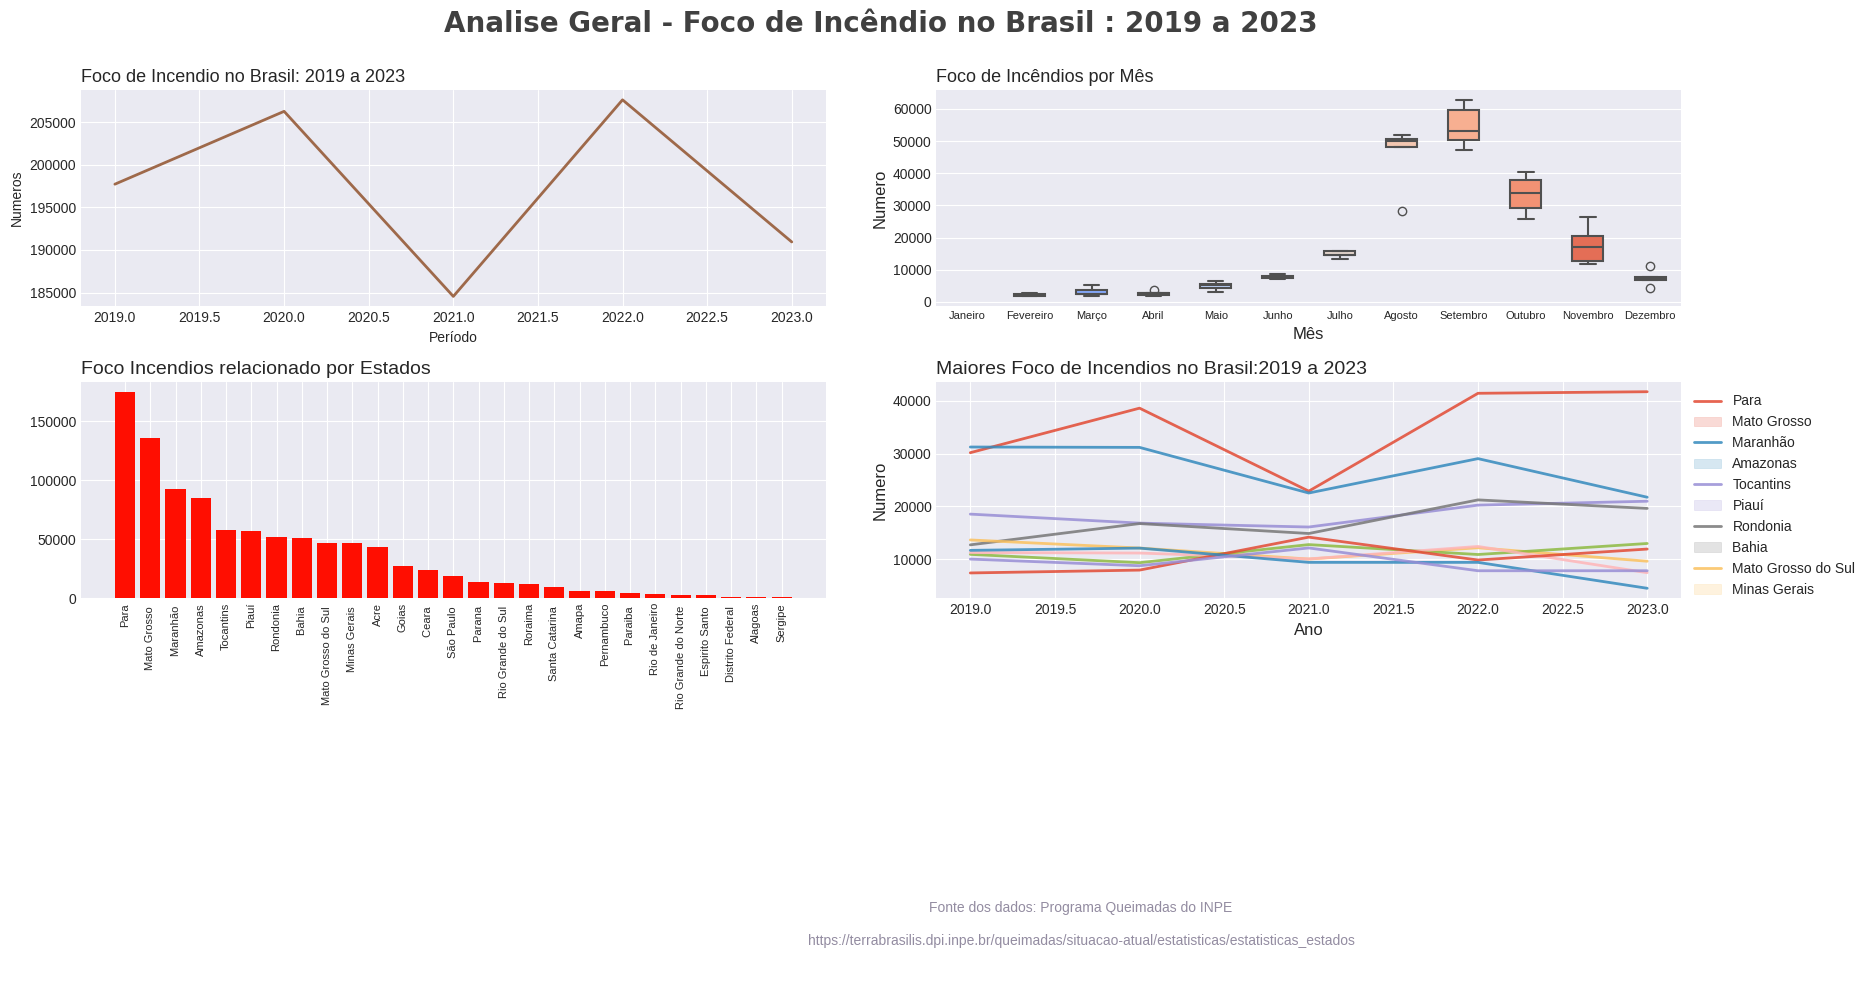

In [ ]:
# Criando os Mapas

fig = plt.figure(figsize=(20, 10))

# Projeto_01
ax = [ None for _ in range(6)]
ax[0] = plt.subplot2grid((3,4), (0,0), colspan=2)
plt.style.use("seaborn-darkgrid")
# Titulo
plt.title("Foco de Incendio no Brasil: 2019 a 2023", loc='left', fontsize=13 )
#  Criando o grafico
sns.lineplot( x="Ano", y="Numero", data=projeto_01, estimator = "sum", color="#91522d", lw=2, err_style=None , alpha=0.85)
# Label
plt.xlabel("Período", fontsize=10)
plt.ylabel("Numeros", fontsize=10);


#Projeto_02
ax[1] = plt.subplot2grid((3,4), (0,2), colspan=2)
# Estilo
plt.style.use("seaborn-darkgrid")
# Titulo
plt.title("Foco de Incêndios por Mês", loc="left", fontsize=13 )
#  Criano o grafico
sns.boxplot(data=projeto_02, x="Mês", y="Numero", palette="coolwarm", saturation=1, width=0.5, linewidth=1.5,
            order=["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"])
# Label
plt.xticks( fontsize=8);

#Projeto_03
ax[2] = plt.subplot2grid((3,4), (1,0), colspan=2)
# Titulo
plt.title("Foco Incendios relacionado por Estados", loc="left", fontsize=14 )
# Criando o grafico
plt.bar(projeto_03.Estado, projeto_03["Numero"], color="#ff0e01" )
# Label
plt.xticks( rotation=90, fontsize=8 );


#Projeto_04
ax[3] = plt.subplot2grid((3,4), (1,2), colspan=2)
# Titulo
plt.title( "Maiores Foco de Incendios no Brasil:2019 a 2023", loc="left", fontsize=14 )
#Criando o grafico


# Loop
for Coluna in projeto_04:

  # Filtrar o estado
  Filtro = brasil_incendios.loc[brasil_incendios["Estado"] == Coluna ]

  # Agrupar os valores para sumarizar
  Analise_Local = Filtro.groupby( by=["Ano"] ).sum().reset_index()

  # Plot
  sns.lineplot(data=Analise_Local, x="Ano", y="Numero", lw=2, alpha=0.85)

# Legenda
plt.legend( projeto_04, bbox_to_anchor=(1, 1) );
# Incluindo o Titulo na Figura
plt.suptitle(f"Analise Geral - Foco de Incêndio no Brasil : 2019 a 2023", fontsize=20, color="#404040", fontfamily="KyivType Sans", fontweight=600 )
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.90, wspace=0.35, hspace=0.35)

# Rodapé
Rodape = '''
Fonte dos dados: Programa Queimadas do INPE

https://terrabrasilis.dpi.inpe.br/queimadas/situacao-atual/estatisticas/estatisticas_estados

'''

# Incluindo o rodape no relatorio
fig.text( 0.6, 0.01, Rodape, ha='center', va='bottom', size=10, color='#938ca1');

plt.show()